# Naive Bayes

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
#refernce to data_preprocessing notebook to use the get_data function
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
#refernce to data_evaluation notebook to use the show_evaluation function
%run data_evaluation.ipynb

### Imports

In [3]:
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Hyperparameters

In [4]:
# for get_data function
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

### Get the data

In [5]:
#apply get_data function
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


## Model

### Create and train the model

In [6]:
#train the model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

### Encode the target variable

In [7]:
# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

## Evaluation

### Predict the test set

In [8]:
#apply the model (predict)
y_prob = naive_bayes.predict(x_test)
y_pred = np.round(y_prob)

### Apply the evaluation metrics

In [9]:
#compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:{}".format(accuracy))

Accuracy:0.6760974186962229


In [10]:
#calculate error-rate
error_rate = 1-accuracy
print("Error-Rate:{}".format(error_rate))

Error-Rate:0.32390258130377714


Precision Score:
0.713535808023997

Recall Score:
0.5663690476190476

F1-Score:
0.6314916210386593

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2733   764
Sick        1457  1903



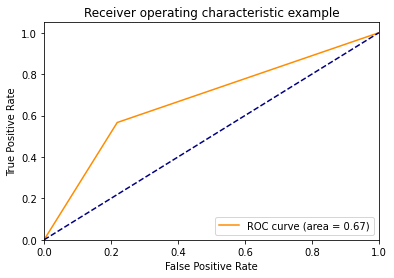


ROC Score:
0.6739480353908793


In [11]:
show_evaluation(y_test, y_pred, y_prob)

## Code to be deleted when decided what to do with it

In [12]:
#function to format the confusion matrix (copied from the exercise script)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

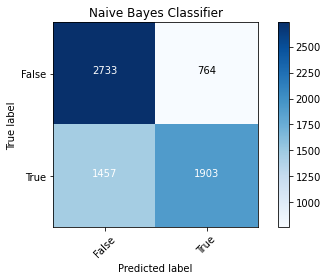

In [13]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Naive Bayes Classifier')

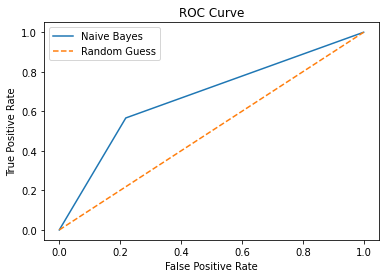

In [14]:
# generate a random guess prediction 
random_guess = [0 for _ in range(len(y_test))]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
rg_fpr, rg_tpr, rg_threshold = roc_curve(y_test, random_guess)

#plot the curves
plt.plot(fpr,tpr,label='Naive Bayes')
plt.plot(rg_fpr,rg_tpr,linestyle='--', label='Random Guess')

#show axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show title
plt.title('ROC Curve')

#show legend
plt.legend()

# show the plot
plt.show()

In [15]:
#area under the roc curve
auc = roc_auc_score(y_test, y_pred)
rg_auc = roc_auc_score(y_test, random_guess)

print('Naive Bayes: ROC AUC=%.4f' % (auc))
print('Random Guess: ROC AUC=%.4f' % (rg_auc))

Naive Bayes: ROC AUC=0.6739
Random Guess: ROC AUC=0.5000
